In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fetch_data
import math

In [2]:
ls_data = fetch_data.getStandings()

In [3]:
pts_array = ls_data['pts'].values
gd_array = ls_data['gd'].values

### Least Squares Applications 

In statistics, it is common to represent the variable of interest $Y$ as a linear combination of other variables (factors) $x_1,...\,x_n$ as 
<br/><br/>
$Y=\beta_1X_1+\beta_2X_2+...\ +\beta_nX_n+\varepsilon$
<br/><br/>
where $\varepsilon$ is a random variable that accounts for the missing factors.

Before we begin, lets talk about Least Squares. 

In some cases $Ax=b$ may not have a solution, if the system is not compatible $(b\not\in img(A))$

In such case, we solve the least squares problem. That is, we want the vector $x\in\mathbb{R}^n$ that minimizes $\parallel Ax-b\parallel^2$ 

### Geometry of Least Squares

We can think about it like this: Lets say we have a plane for the $img(A)$ and we make a vector $\hat w=A\hat x$ , this vector would be in the $img(A)$ because we are multiplying any vector in $\mathbb{R}^n$ times our matrix $A$. Now since our vector $(b\not\in img(A))$, we need to find a vector that minimizes the distance between our vector $w$ and $b$. We call this the residual, $\hat r=b-A\hat x$ , the resiudal is what measures how close $A\hat x$ is to $b$.


$\begin{Vmatrix}
b_1-w_1\\
b_2-w_2\\
...\\
b_n-w_n\\
\end{Vmatrix}^2=(b_1-v_1)^2+(b_2-v_2)^2+...+(b_n-v_n)^2=\hat r$

This example is where the least squares terminology comes from, we are trying to find the least squares estimate (least squared distances). Now the closest vector in any subspace to a vector that is not in the subspace is called the projection. So, $\hat w=A\hat x$ is called the projection of $b$ onto $img(A)$. Now through the fundamental theorem of linear algebra, our residual $\hat r$ lies in the $coker(A)$ because the residual is orthogonal to the $img(A)$. Now we know, the "best" solution is one for which the residual is orthogonal to the $img(A)$, since the $coker(A)=(img(A))^\perp$.


### Derivation
Through the information we now know, we can derive the "normal equation". 

Since, $b-A\hat x\in coker(A)$ then  $A^\top(b-A\hat x)=0$ 

$A^\top b-A^\top A\hat x$ then translates to $(A^\top A\hat x=A^\top b)$ 

In the case for Linear Regression, the normal equation would then just be $(X^\top X\hat\beta=X^\top y)$ 

Furthermore, solving for $\beta$ we get $\beta=(X^\top X)^{-1}X^\top y$

### Now lets do Linear Regression

In [30]:
#constructing our first vector (Goal Differences)
x1 = np.array(gd_array).reshape(-1,1)

#constructing our design matrix 
ones_array = np.ones_like(x1)
X = np.hstack((ones_array, x1))

#constructing our column response vector (Points)
y = np.array(pts_array)

In [49]:
print('The design matrix is:')
print(X[:5]) #showing an example of the first 5 rows of the design matrix 

print('The data vector is:')
print(y[:5]) #showing an example of the first 5 observations of the data vector 

The design matrix is:
[[ 1 73]
 [ 1 50]
 [ 1 61]
 [ 1 49]
 [ 1 68]]
The data vector is:
[93 88 89 90 92]


Computing the equation $\beta = (X^\top X)^{-1} X^\top y$

In [50]:
beta = np.dot((np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)), y)
print('The least squares coefficients are \n')
print(beta)

The least squares coefficients are 

[51.51670337  0.55603074]


Text(0, 0.5, 'Points (y)')

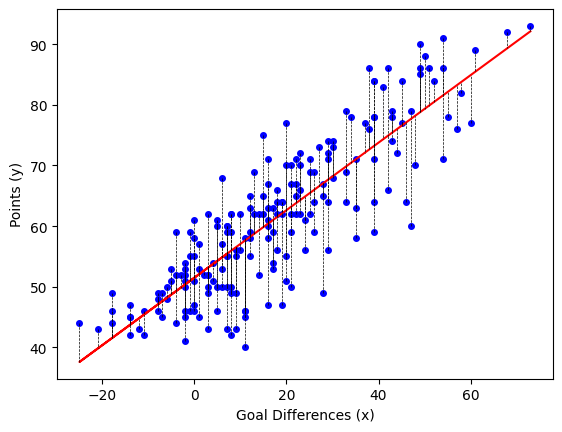

In [86]:
fig, ax = plt.subplots()

#getting our residuals vector 
residual_vector = y - np.dot(X, beta)

ax.plot(x1, y, linestyle='none', markersize=4, marker='o', color='blue')

#plotting our least squares line
ax.plot(x1, beta[0] + beta[1]*x1, 'r')
#plotting residual lines
for i in range(len(x1)):
    ax.plot([x1[i], x1[i]], [y[i], y[i] - residual_vector[i]], 'k--', linewidth=0.5)
    
ax.set_xlabel('Goal Differences (x)')
ax.set_ylabel('Points (y)')

### Nows lets see how many points a team with a goal difference of +48 can expect 

In [55]:
print('y = %d points' % math.floor(beta[0] + beta[1]*49))

y = 78 points


In [91]:
#calculate the mean of our response vector 
mean_y = np.mean(y)
#calculate the total sum of squares (TSS)
TSS = np.sum((y - mean_y)**2)
#calculate R squared
R_squared = 1 - (residual_vector**2).sum() / TSS
print("R squared:", R_squared)

R squared: 0.7218755174333396
